In [6]:
import pyGPs
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial,stats

ModuleNotFoundError: No module named 'pyGPs'

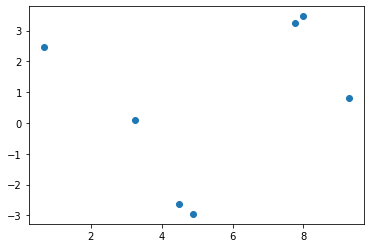

In [2]:
x = np.sort(np.random.uniform(size = 7))*3*np.pi
y = 3*np.sin(x)+np.random.random(size=(7,))
plt.scatter(x, y)

Number of line searches 20


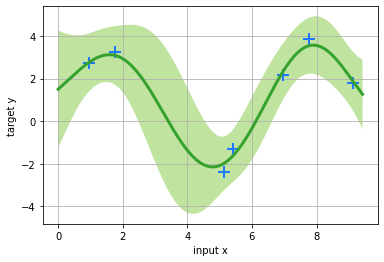

In [31]:
x_sample = np.linspace(0, 3*np.pi, 1000)

model = pyGPs.GPR()
model.getPosterior(x, y)
model.optimize(x, y)
model.predict(x_sample)
model.plot()

In [3]:
# Define the squared exponential kernel 
def se_kernel(xa, xb, sigma=1):
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5/sigma**2 * spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

In [4]:
# Sample from the Gaussian process distribution
nb_of_samples = 101  # Number of points in each function
number_of_functions = 10  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(0, 10, nb_of_samples), 1)
K = se_kernel(X, X, sigma=1.5)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
distribution = stats.multivariate_normal(cov=K, allow_singular=True)
ys = distribution.rvs(size=number_of_functions)

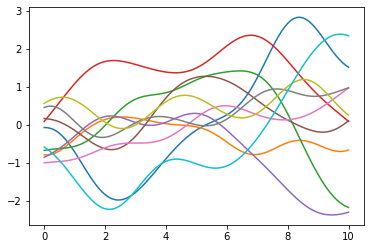

In [5]:
plt.plot(X.ravel(), ys.T)